# Первая часть. Исследование

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [50]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [6]:
train_data.head(2)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0


In [7]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Посмотрев на информацию о данных, мы видим, что нулевых значений как будто нет, но есть такая колонка как "TotalSpent"- ee тип object, однако по условию это числовой признак.

In [9]:
train_data['TotalSpent'] = pd.to_numeric(train_data['TotalSpent'], errors='coerce')
train_data['TotalSpent'] = train_data['TotalSpent'].fillna(train_data['TotalSpent'].isnull())
train_data.head(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.0,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

# Построим гистограммы, используя библиотеку sklearn.
Работа с числовыми признаками



<Axes: xlabel='ClientPeriod', ylabel='Count'>

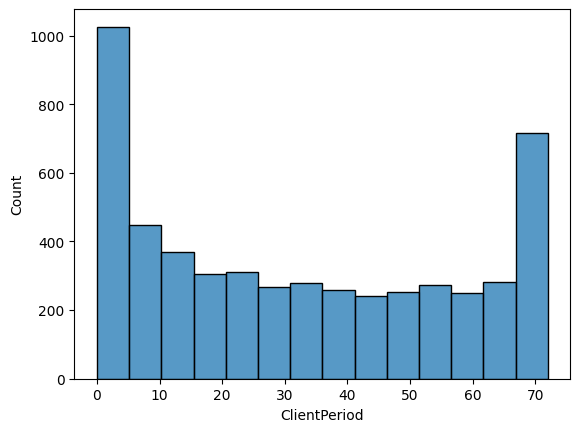

In [10]:
sns.histplot(data=train_data[num_cols], x = 'ClientPeriod')

<Axes: xlabel='MonthlySpending', ylabel='Count'>

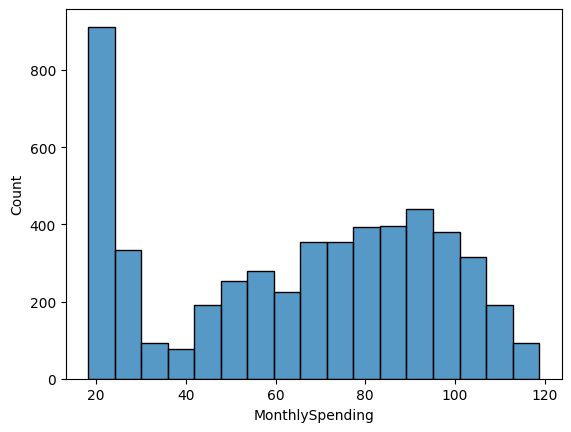

In [11]:
sns.histplot(data=train_data, x = 'MonthlySpending')

<Axes: xlabel='TotalSpent', ylabel='Count'>

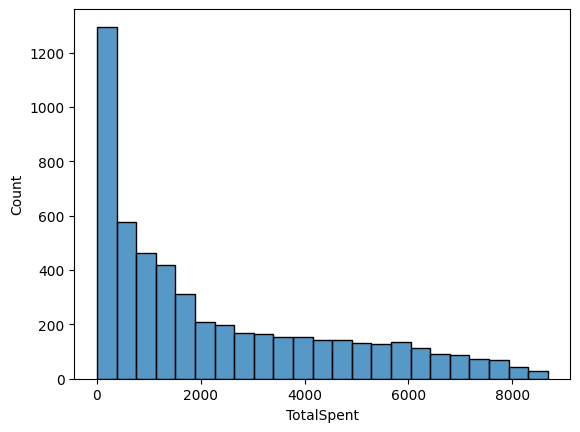

In [12]:
sns.histplot(data=train_data, x= 'TotalSpent')

# Категориальные признаки

In [13]:
for col in train_data[cat_cols]:
  print(train_data[col].value_counts(), end='\n\n')

Male      2655
Female    2627
Name: Sex, dtype: int64

0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

No     2705
Yes    2577
Name: HasPartner, dtype: int64

No     3676
Yes    1606
Name: HasChild, dtype: int64

Yes    4761
No      521
Name: HasPhoneService, dtype: int64

No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64

No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64

No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: in

Наглядное представление:

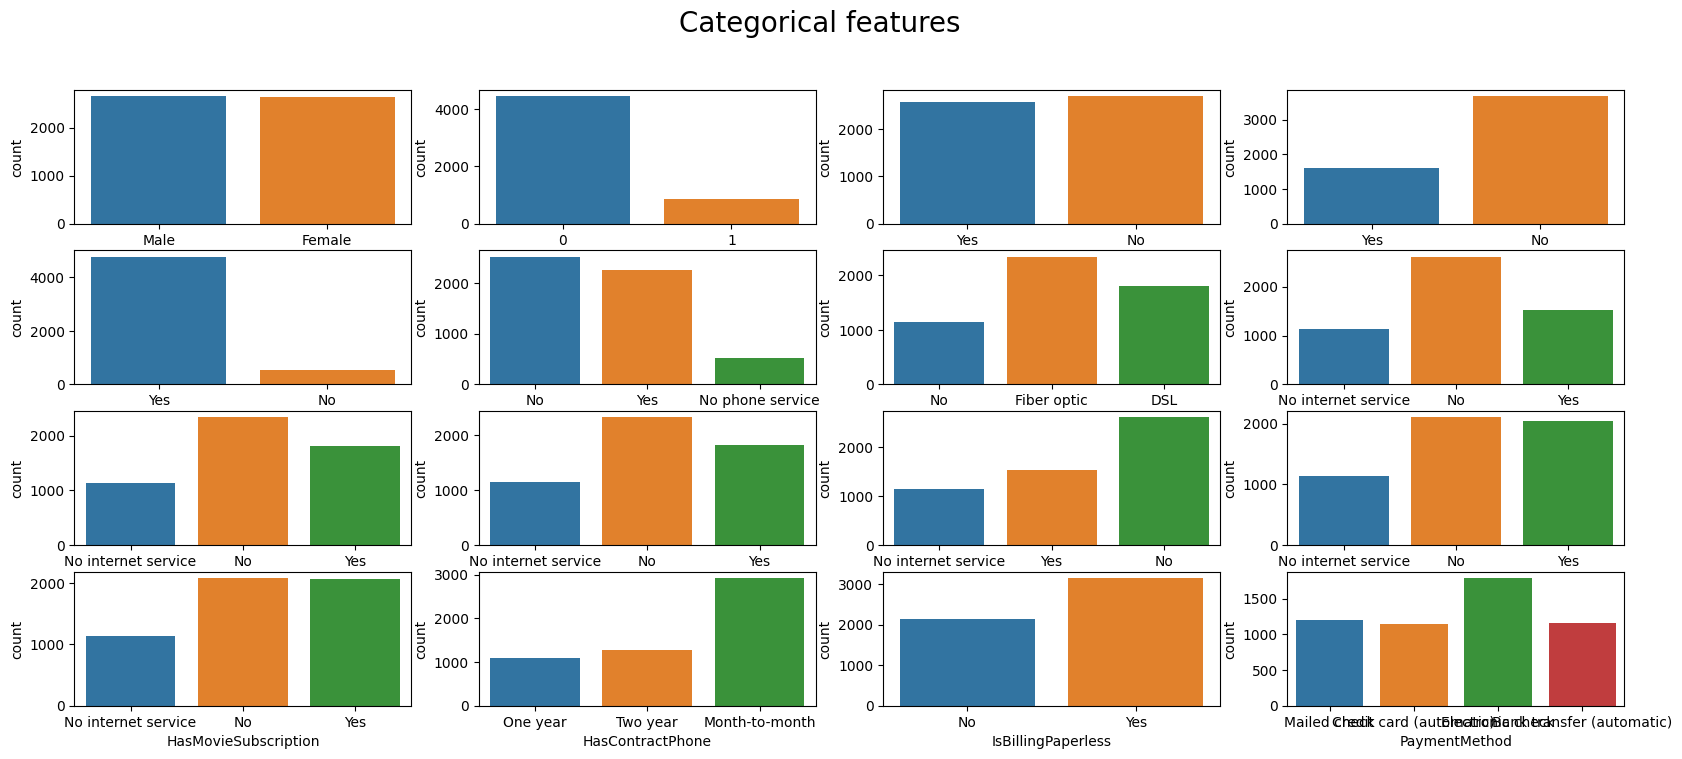

In [14]:
fig = plt.figure(figsize = (20,8))
plt.suptitle("Categorical features ", fontsize = 20)
coor = 1
for col in range(len(cat_cols)):
  plt.subplot(4, 4, coor)
  sns.countplot(data = train_data, x = cat_cols[col])
  coor += 1
plt.show()

# Целевая переменная

<Axes: xlabel='Churn', ylabel='count'>

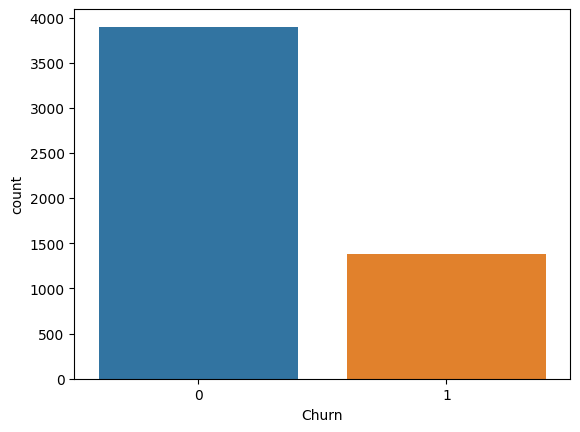

In [15]:
sns.countplot(data = train_data, x=target_col)

Исходя из того, как сбалансированы классы можно сказать, что использование roc-auc будет хорошим решением.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

Удалим целевую колонку

In [17]:
X_train = train_data.drop(target_col, axis = 1)

Применим ColumnTransformer, который для числовых признаков применит StandardScaler(), для категориальных - OneHotencoder()

In [18]:
pipeline = ColumnTransformer([
        ('num_cols', StandardScaler(), num_cols),
        ('cat_cols', OneHotEncoder(), cat_cols)
    ])

Создадим наш pipeline

In [19]:
pipe = make_pipeline(pipeline, LogisticRegression(random_state = 17))

In [20]:
parametrs = {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logisticregression__max_iter': [100, 500, 1000]
}

С помощью GridSearchCV определим лучшие параметры для нашей модели, не забудем в параметрах указать scoring!

In [77]:
model = GridSearchCV(pipe, parametrs, refit = True, cv = 5, scoring = 'roc_auc', error_score = 'raise', )

In [22]:
model.fit(X_train, train_data[target_col])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_cols',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat_cols',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSec...,
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod'])])),
                                       ('logisticregression',
                                        LogisticRegression(random_state=17))]),
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001],
                         'logisticregression__max_iter': [100, 500, 1000]},
             scoring='roc_auc')

Выведем лучшие параметры для нашей модели

In [23]:
model.best_params_

{'logisticregression__C': 10, 'logisticregression__max_iter': 500}

Ну и собственно лучший предикт

In [24]:
model.best_score_

0.8451149092713439

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [25]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:00


Разобьем выборку на train и test.

In [26]:
y = train_data[target_col]
X = train_data.drop(target_col, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17, test_size=0.3)

Импортируем нужные нам методы

In [27]:
from catboost import CatBoostRegressor, CatBoostClassifier

In [28]:
model_boost = CatBoostClassifier()
model_boost.fit(X_train, y_train, cat_features=cat_cols, verbose=False)

Предсказываем результат и получаем roc_auc

In [29]:
y_pred = model_boost.predict_proba(X_test)[:, 1]

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8401467528010322

Внесем параметры для CatBoostClassifier, чтобы потом выбрать наилучшие, тем самым получим предикт выше

In [31]:
grid = {'learning_rate': np.linspace(0.01, 0.1, 20),
        'max_depth': [4, 6, 10],
        'iterations': [10, 30, 50]}

In [32]:
model_new = CatBoostClassifier(cat_features=cat_cols, random_seed = 17, eval_metric = 'AUC', verbose = False)
grid_boost = model_new.grid_search(grid, X_train, y_train, cv=5)


bestTest = 0.8060364851
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8060365	best: 0.8060365 (0)	total: 95.2ms	remaining: 17s

bestTest = 0.8067735134
bestIteration = 6

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8067735	best: 0.8067735 (1)	total: 168ms	remaining: 15s

bestTest = 0.8069566538
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8069567	best: 0.8069567 (2)	total: 250ms	remaining: 14.8s

bestTest = 0.8061704903
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8061705	best: 0.8069567 (2)	total: 387ms	remaining: 17s

bestTest = 0.806

Лучшие параметры, которые мы получили:

In [33]:
grid_boost['params']

{'depth': 6, 'iterations': 50, 'learning_rate': 0.08578947368421053}

In [34]:
final_model = CatBoostClassifier(
    depth=6,
    iterations=50,
    random_seed=17,
    eval_metric = 'AUC',
    l2_leaf_reg = 1,
    learning_rate= 0.08578947368421053,
    cat_features=cat_cols)

In [35]:
final_model.fit(X_train, y_train)

0:	total: 4.82ms	remaining: 236ms
1:	total: 10.3ms	remaining: 246ms
2:	total: 15.3ms	remaining: 240ms
3:	total: 20ms	remaining: 229ms
4:	total: 24.2ms	remaining: 218ms
5:	total: 28.2ms	remaining: 207ms
6:	total: 32.5ms	remaining: 200ms
7:	total: 36.5ms	remaining: 192ms
8:	total: 40.5ms	remaining: 185ms
9:	total: 44.6ms	remaining: 179ms
10:	total: 48.7ms	remaining: 173ms
11:	total: 51.7ms	remaining: 164ms
12:	total: 54.3ms	remaining: 154ms
13:	total: 58.2ms	remaining: 150ms
14:	total: 62.1ms	remaining: 145ms
15:	total: 66ms	remaining: 140ms
16:	total: 69.9ms	remaining: 136ms
17:	total: 73.8ms	remaining: 131ms
18:	total: 77.7ms	remaining: 127ms
19:	total: 81.6ms	remaining: 122ms
20:	total: 85.7ms	remaining: 118ms
21:	total: 89.6ms	remaining: 114ms
22:	total: 93.6ms	remaining: 110ms
23:	total: 97.6ms	remaining: 106ms
24:	total: 99.6ms	remaining: 99.6ms
25:	total: 102ms	remaining: 94.2ms
26:	total: 105ms	remaining: 89.6ms
27:	total: 109ms	remaining: 85.8ms
28:	total: 113ms	remaining: 81.9m

In [41]:
y_pred = final_model.predict_proba(X_test)[:, 1]

Наш наилучший результат:

In [42]:
roc_auc_score(y_test, y_pred)

0.8403998123232383

#Предсказания

In [64]:
best_model = final_model

In [65]:
test_data['TotalSpent'] = test_data['TotalSpent'].replace(" ", "0").astype('float')

In [69]:
preds = best_model.predict_proba(test_data)[:, 1]
submission = pd.read_csv('submission.csv')
submission['Churn'] = preds

In [76]:
submission.to_csv('./my_sub.csv')

In [71]:
submission.head()

,Id,Churn
0,0,0.054202
1,1,0.605693
2,2,0.668682
3,3,0.032584
4,4,0.021185
